# Multi class classification network

DISCLAIMER: You need to download and save the keystroke dataset in the data/Keystrokes folder. The dataset is not included in the repository due to its size. You can download the dataset from the following link: https://userinterfaces.aalto.fi/136Mkeystrokes/

When you have downloaded and unzipped the dataset, you can run the following code to generate the datasets and train the model.


## Data handling and pre processing

We first save the data in custom datasets. Each participant wrote 15 sentences. We take 10 of each participant to train the model. Only run this cell if you need to regenerate datasets, e.g. if you need more or fewer datasets.


Load the saved dataset and extract the features and target variable.

In [1]:
import src.data_processor as data_processor
keystroke_df = data_processor.read_keystroke_data('../data/Keystrokes/files/*_keystrokes.txt', 1000)
data_processor.save_keystroke_dataset(keystroke_df, 10)

Reading keystroke data from files matching the pattern: ../data/Keystrokes/files/*_keystrokes.txt
current working directory:  /Users/miamahncke/Development/keystroke_gen/src


---
Get the share of data reserverd for training and testing.
NOTE: Run the script from this point if you have restarted the kernel but do not want to rewrite the data.

In [2]:
import src.data_processor as data_processor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
dataset = data_processor.get_train_data()

# Extract features and target variable
X = dataset.data  # Features
y = dataset.labels  # Target labels 
# Encode the target variable (PARTICIPANT_ID) using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = data_processor.encode_participant_ids(label_encoder.fit_transform(y))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


## Neural network model training
---

Train the neural network model. When running this, the trained model will be saved in the model.npy file.

In each 100th epoch, we print the mean squared error of the model.
Feel free to vary the hidden layers and the number of epochs or learning rate to see how the model performs.

Epoch 0, Loss: 12.350946616607239, Validation Loss: 8.927613375680064
Epoch 100, Loss: 6.922059554266305, Validation Loss: 6.91998049848589


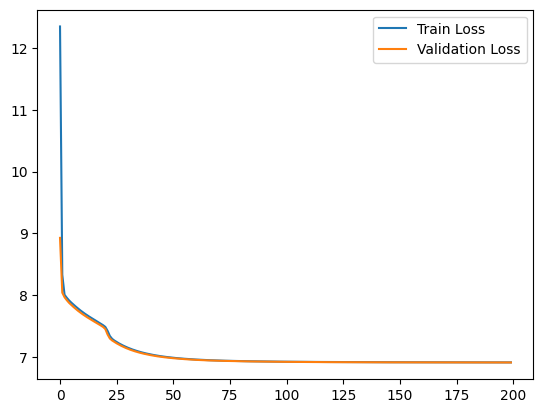

prediction:  [[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
accuracy:  0.001
precision:  1.6349700473487325e-06


In [3]:
import numpy as np
from neural_network import NeuralNetwork
# Initialize and train the neural network model
layers = [X_train.shape[1], 7, 4, len(label_encoder.classes_)]
nn = NeuralNetwork(layer_structure=layers, learning_rate=0.0001, activation='relu')
nn.train(X_train, y_train, epochs=200)


# Get predictions and calculate the mean squared error
y_pred = nn.get_prediction(X_test)
nn.plot_learning()
nn.save_model('model')
print("prediction: ", y_pred)
print("accuracy: ", nn.calculate_accuracy(y_test, y_pred))
print("precision: ", nn.calculate_macro_precision(y_test, y_pred))


## Making predictions

NOTE: run the script from this point if you have already generated the datasets and split the data into training and testing sets.

In the following cell, we load the trained model and use it to predict the participant ID of 10 random sentences. 
We print the predicted and true participant IDs. You can choose one and get the models prediction in the next cell.

In [9]:
import src.data_processor as data_processor
from neural_network import NeuralNetwork
from sklearn.preprocessing import LabelEncoder
import numpy as np

# load the model
nn = NeuralNetwork(file='model.npy', layer_structure=None)

# Encode the target variable (PARTICIPANT_ID) using LabelEncoder
label_encoder = LabelEncoder()
unseen_data = data_processor.get_classify_data()
unseen_y = unseen_data.labels
unseen_y_encoded = data_processor.encode_participant_ids(label_encoder.fit_transform(unseen_y))
unseen_X = unseen_data.data

indices = np.random.choice(unseen_X.shape[0], 3, replace=False)
for i in indices:
    print(f"Index:{i}, Participant ID: {unseen_y[i]}, Keystroke features: {unseen_X[i]}")
# generate random indices
# print sentences and participant ids

# show 10 participants with their sentences. User selects one that is predicted by model

Index:3747, Participant ID: 392596, Keystroke features: [ 1.83310514e-10  2.10055190e-09 -2.87457949e-09  6.44528445e-09
  9.75880944e-09  5.00397965e-09  3.10662129e-09  3.18946455e-08
 -1.07608897e+00  2.20000000e+01]
Index:2233, Participant ID: 224413, Keystroke features: [ 1.75229427e-08  1.42840234e-07 -5.44263211e-09  1.07676616e-06
  1.93890826e-08  8.73550552e-08  2.14011690e-09  6.61019979e-07
 -1.07608897e+00  2.00000000e+01]
Index:359, Participant ID: 37134, Keystroke features: [-1.14634724e-09  2.82113689e-09 -3.52529148e-09  1.35956437e-08
  2.10598242e-08  1.21522363e-08  8.14625145e-09  7.07619299e-08
 -1.07608897e+00  1.80000000e+01]


In [11]:
index = 3747
pred, _ = nn.forward(unseen_X[index])
print(f"Predicted participant ID: {label_encoder.inverse_transform([np.argmax(pred)])}, True participant ID: {unseen_y[index]}")

Predicted participant ID: [1057], True participant ID: 392596


## Training with generated datasets

My chosen dataset of keystroke dynamics does not work well, therefore I provide fake data to see the working of the model.
The following cell generates a dataset with 1000 observations and 3 labels. We then train a neural network model on the dataset and make predictions on the test set. We print the accuracy and precision of the model.

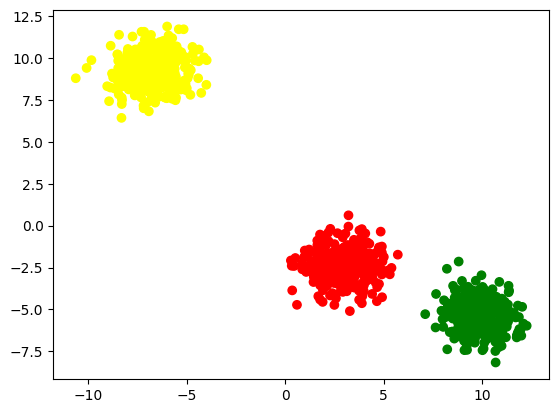

Epoch 0, Loss: 33.975103785613626, Validation Loss: 31.13545826845283
Epoch 100, Loss: 0.4741311083931249, Validation Loss: 0.4702727463856252
Epoch 200, Loss: 0.4330570801632042, Validation Loss: 0.4438541300570285
Epoch 300, Loss: 0.41987866872422563, Validation Loss: 0.43706354312267603
Epoch 400, Loss: 0.41447003138120886, Validation Loss: 0.43545921907900864
Epoch 500, Loss: 0.4111427375608051, Validation Loss: 0.4352026602477614
Epoch 600, Loss: 0.4089596551296184, Validation Loss: 0.43569132870221755
Epoch 700, Loss: 0.40825211261767774, Validation Loss: 0.4369195742758272
Epoch 800, Loss: 0.4077322678681835, Validation Loss: 0.4380733283010869
Epoch 900, Loss: 0.40724409644214604, Validation Loss: 0.4391334901403717
_________ 
 accuracy:  0.645
_________ 
 precision:  0.47685953460928565


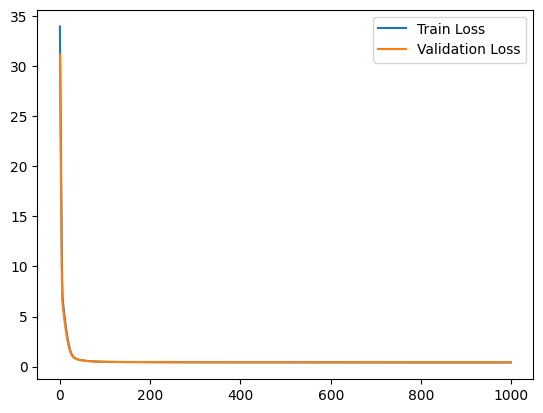

In [6]:
import matplotlib
from sklearn.datasets import make_blobs
import src.data_processor as data_processor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from neural_network import NeuralNetwork
import matplotlib.pyplot as plt

 # color map for better visualization
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red", "yellow", "green"])

# Generating 1000 observations with 10 labels
data, labels = make_blobs(n_samples=1000, centers=3, n_features=3, random_state=30)

# plot
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=my_cmap)
plt.show()

# one hot encoding for y
label_encoder = LabelEncoder()
y_encoded = data_processor.encode_participant_ids(label_encoder.fit_transform(labels))

# split the data
X_train, X_test, y_train, y_test = train_test_split(data, y_encoded, stratify=labels, test_size=0.2, random_state=42)

# Create a neural network instance
layer_structure = [X_train.shape[1], 4, 3]
nn = NeuralNetwork(file=None, layer_structure=layer_structure, learning_rate=0.00002, activation='relu')

# Train the neural network and make predictions on training data
nn.train(X_train, y_train, epochs=1000)
predictions = nn.get_prediction(X_test)
print("_________ \n accuracy: ", nn.calculate_accuracy(y_test, predictions))
print("_________ \n precision: ", nn.calculate_macro_precision(y_test, predictions))
nn.plot_learning()